# texture-diffusion
using my local huggingface env

https://huggingface.co/dream-textures/texture-diffusion

In [1]:
from diffusers import StableDiffusionPipeline
import torch
from IPython.display import Image

model_id = "dream-textures/texture-diffusion"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "pbr brick wall"
image = pipe(prompt).images[0]  
    
image.save("bricks.png")


text_encoder\model.safetensors not found


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch C:\Users\willi\.cache\huggingface\hub\models--dream-textures--texture-diffusion\snapshots\981e240aab8807bbf8b04afdb7f5c3f893c22e43\unet: Error no file named diffusion_pytorch_model.safetensors found in directory C:\Users\willi\.cache\huggingface\hub\models--dream-textures--texture-diffusion\snapshots\981e240aab8807bbf8b04afdb7f5c3f893c22e43\unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
c:\Users\willi\miniconda3\envs\huggingface\Lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
An error occurred while trying to fetch C:\Users\willi\.cache\huggingface\hub\models--dream-textures--texture

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

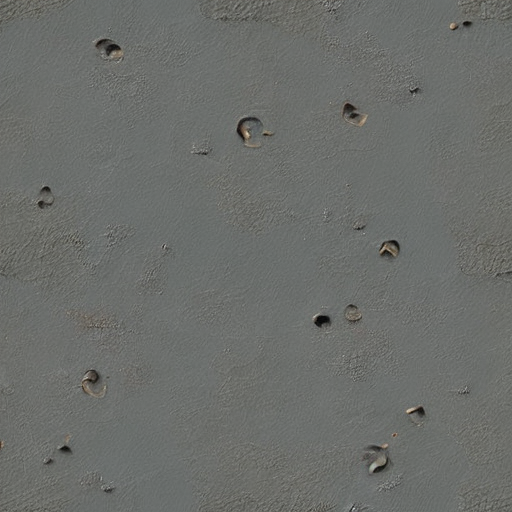

In [2]:
def make_image(prompt,path="default.png"):
    image = pipe(prompt).images[0] 
    image.save(path)
    return image

prompt = "lifeless planet surface.  game texture surface"
image = make_image(prompt)
Image(filename="default.png")



Loop through a range of textures 

In [3]:

prompt = "A habitable planet.With blue oceans and green continents. Mountains, rivers, lakes, big blue oceans. game texture surface"
for i in range(5):
    image = make_image(prompt,f"planet_{i}.png")
    

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

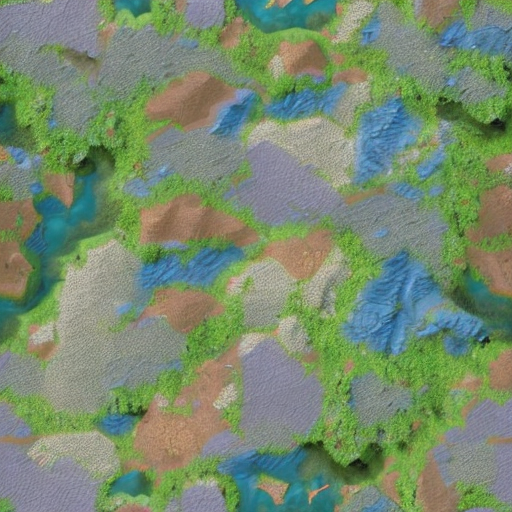

In [4]:
Image(filename=f"planet_{4}.png")

# Using data from the game to make the textures

In [ ]:
import sys, os
sys.path.append('../..')
import pandas as pd
import yaml 

import  ssl, asyncio
ssl._create_default_https_context = ssl._create_unverified_context
asyncio.set_event_loop_policy(asyncio.WindowsSelectorEventLoopPolicy())
import nest_asyncio
nest_asyncio.apply()
# this is required for running in a Jupyter Notebook. 


from app.connectors.cmdb_graph import CosmosdbClient
c = CosmosdbClient()

executing local windows deployment
something wrong with your query: <class 'Exception'>


In [ ]:
query = """
    g.V().hasLabel('planet').has('atmosphere').valueMap()
"""

c.run_query(query)

In [10]:
data = c.clean_nodes(c.res)

In [44]:
def get_top_two_atmo(planet):
    atmo = yaml.safe_load(planet['atmosphere'])
    atmo_names = (pd.DataFrame(
        {k: v for d in atmo for k, v in d.items()}
        ,index=['value'])
            .T
            .sort_values(by='value',ascending=False)[:2]).index

    return ' and '.join(atmo_names)


get_top_two_atmo(data[0])

'Hydrogen and Argon'

In [11]:
pd.DataFrame(data)

,atmosphere,name,class,objid,pop_cap,radius,mass,orbitsDistance,orbitsId,orbitsName,isSupportsLife,isPopulated,isHomeworld,userguid,objtype,id
0,"[{Argon: np.float64(0.198)}, {Carbon Dioxide: ...",Dessevertor,terrestrial,6900299438808,100,0.662,1.489,0.639,3904198844110,Fran,true,true,true,ac5b8081-7ef9-4bce-baac-6d0ea7e1782c,planet,6900299438808
1,"[{Argon: 0.23}, {Carbon Dioxide: 0.123}, {Heli...",Velgua,terrestrial,8227114694613,100,0.722,0.852,0.905,8727610707382,Fiporgi,true,true,true,9555d9ba-4564-43a7-ad7f-f06d3174cd24,planet,8227114694613
2,"[{Argon: np.float64(0.264)}, {Carbon Dioxide: ...",Rezdibarve,terrestrial,5941709224109,100,1.038,0.956,1.035,6629152792628,Sno,true,true,true,6e9492d5-44af-4a8e-90ac-1237e87688d6,planet,5941709224109
3,"[{Argon: 0.0}, {Carbon Dioxide: 0.257}, {Heliu...",Rahchadenlai,terrestrial,1914558242671,100,0.773,0.301,1.474,8433451165062,Vilbaspen,true,true,true,8d5b667f-b225-4641-b499-73b77558ff86,planet,1914558242671


In [12]:
for planet in data:
    print(planet['name'])

Dessevertor
Velgua
Rezdibarve
Rahchadenlai


In [47]:
def get_most_common_eliments(atmosphere):
    elements = atmosphere.split(",")
    elements = [element.strip() for element in elements]
    elements = [element for element in elements if element != ""]
    return elements


def planet_prompt(planet):
    prompt = f"A habitable planet. With {get_top_two_atmo(planet)}. "
    if planet['isPopulated'] == 'true':
        prompt += "Populated with intelligent life. "
    if planet['isSupportsLife'] == 'true':
        prompt += "the planet supports life. "
    prompt += "game texture surface"
    return prompt


prompts = []
for planet in data:
    pprompt = planet_prompt(planet)
    print(planet['name'],": ", pprompt)
    prompts.append(pprompt)
    


Dessevertor :  A habitable planet. With Hydrogen and Argon. Populated with intelligent life. the planet supports life. game texture surface
Velgua :  A habitable planet. With Nitrogen and Argon. Populated with intelligent life. the planet supports life. game texture surface
Rezdibarve :  A habitable planet. With Carbon Dioxide and Argon. Populated with intelligent life. the planet supports life. game texture surface
Rahchadenlai :  A habitable planet. With Carbon Dioxide and Hydrogen. Populated with intelligent life. the planet supports life. game texture surface


In [48]:
imgs = []
for planet in data:
    pprompt = planet_prompt(planet)
    image = make_image(prompt,path=f"planet_{planet['objid']}.png")
    imgs.append(image)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Dessevertor :  A habitable planet. With Hydrogen and Argon. Populated with intelligent life. the planet supports life. game texture surface
Velgua :  A habitable planet. With Nitrogen and Argon. Populated with intelligent life. the planet supports life. game texture surface
Rezdibarve :  A habitable planet. With Carbon Dioxide and Argon. Populated with intelligent life. the planet supports life. game texture surface
Rahchadenlai :  A habitable planet. With Carbon Dioxide and Hydrogen. Populated with intelligent life. the planet supports life. game texture surface


<Figure size 1500x1500 with 0 Axes>

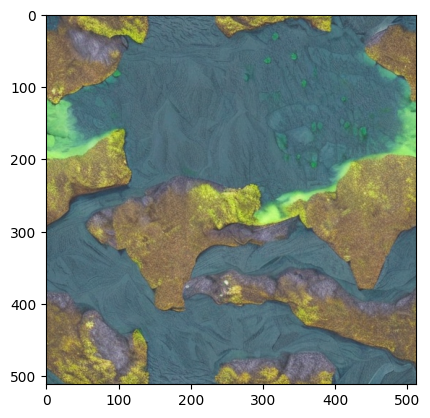

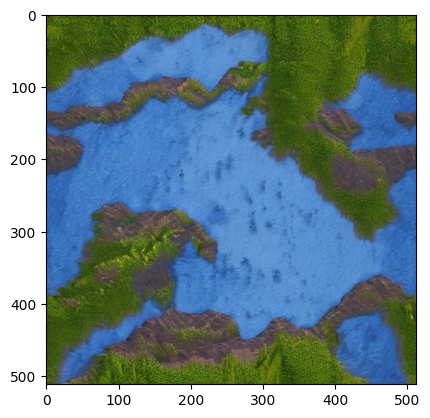

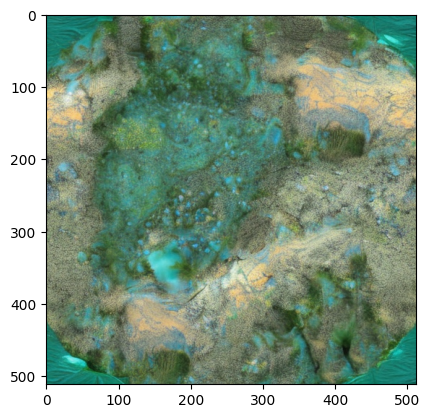

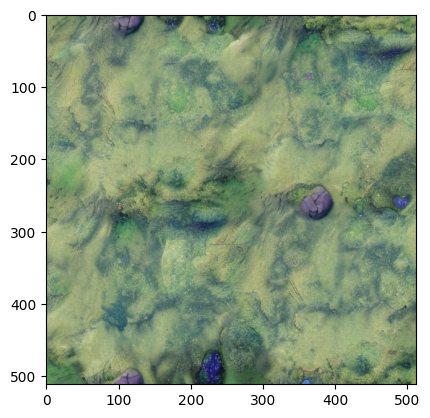

In [56]:
plt.gcf().set_size_inches(15, 15)

for i, ima in enumerate(imgs):
    plt.figure()
    print(data[i]['name'],": ", prompts[i])
    plt.imshow(ima)

    